C:\Users\rickg\AppData\Local\Temp\ipykernel_6212\1971360857.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(results_path, delim_whitespace=True)


    gen       best       mean        std
0     0  86.040905   1.357745  15.268180
2     0  86.040905   1.357745  15.268180
4     1  86.040905   1.357745  15.268180
6     2  86.040905   1.357745  15.268180
8     3  86.040905   1.357745  15.268180
10    4  87.297367  44.320277  26.106479
12    5  87.297367  44.320277  26.106479
14    6  87.297367  44.320277  26.106479
16    7  87.297367  44.320277  26.106479
18    8  87.297367  44.320277  26.106479
Plot saved at: basic_helloworld_3\evolution_plot.png


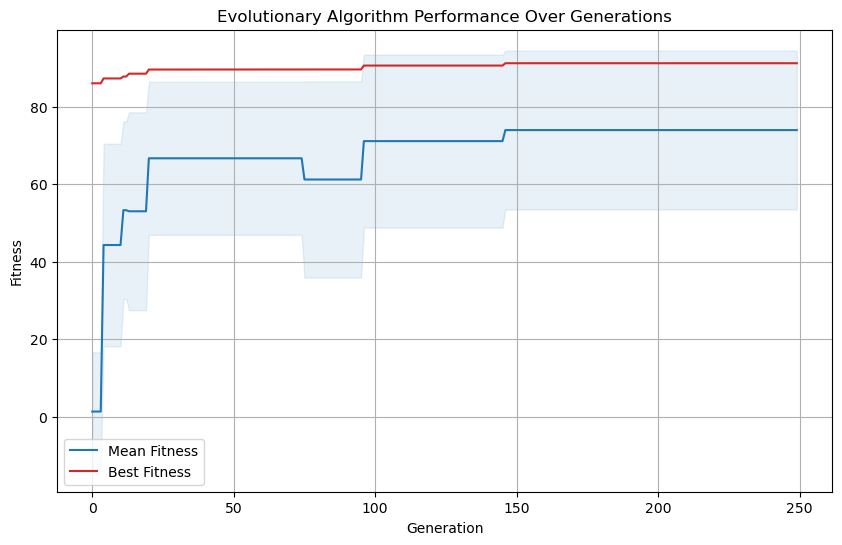

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_evolutionary_results(results_folder="basic_helloworld_3", results_file="results.txt"):
    # Define the path to the results file
    #script_dir = os.path.dirname(os.path.abspath(__file__))
    results_path = os.path.join(results_folder, results_file)
    
    # Check if the file exists
    if not os.path.exists(results_path):
        print(f"Results file not found at: {results_path}")
        return
    
    # Read the results file
    try:
        # Read the file into a pandas DataFrame
        df = pd.read_csv(results_path, delim_whitespace=True)

        # Filter only rows where 'best', 'mean', 'std' are numeric
        df = df[pd.to_numeric(df['best'], errors='coerce').notnull()]
        
        # Convert columns to numeric
        df['best'] = pd.to_numeric(df['best'])
        df['mean'] = pd.to_numeric(df['mean'])
        df['std'] = pd.to_numeric(df['std'])
        df['gen'] = pd.to_numeric(df['gen'])

        # Extract generations, best, mean, and std fitness values
        generations = df['gen']
        best_fitness = df['best']
        mean_fitness = df['mean']
        std_fitness = df['std']
        
    except Exception as e:
        print(f"Error reading the file: {e}")
        return

    print(df[['gen', 'best', 'mean', 'std']].head(10))  
    # Plotting the data
    plt.figure(figsize=(10, 6))

    
    # Plot mean fitness with shaded standard deviation region
    plt.plot(generations, mean_fitness, label="Mean Fitness", color="#1f77b4")
    plt.fill_between(generations, mean_fitness - std_fitness, mean_fitness + std_fitness, color="#1f77b4", alpha=0.1)

    # Plot best fitness
    plt.plot(generations, best_fitness, label="Best Fitness", color="#d62728")

    
    # Add labels and title
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Evolutionary Algorithm Performance Over Generations')
    plt.legend()

    # Show grid
    plt.grid(True)

    # Save the plot as an image file
    plot_file = os.path.join(results_folder, 'evolution_plot.png')
    #plt.savefig(plot_file)
    print(f"Plot saved at: {plot_file}")
    
    # Show the plot
    plt.show()

plot_evolutionary_results()
